In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib as mpl

In [3]:
comb_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
whole_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/whole_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
spk = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/spike_train_0.2ms.npy")[980*50000:].reshape((20,-1))

pred_beniag = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/y_spikes_hat.npy")
spk_beniag = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/y_spikes_GT.npy")

fpr_comb_pred, tpr_comb_pred, _ = roc_curve(spk.flatten(), comb_pred.flatten())
fpr_whole_pred, tpr_whole_pred, _ = roc_curve(spk.flatten(), whole_pred.flatten())
fpr_beniag, tpr_beniag, _ = roc_curve(spk_beniag.flatten(), pred_beniag.flatten())
beniag_idx = np.where(np.sum(spk_beniag,1) > 0)[0]

rocarea_comb_pred = roc_auc_score(spk.flatten(), comb_pred.flatten())
rocarea_whole_pred = roc_auc_score(spk.flatten(), whole_pred.flatten())

rocarea_array = np.zeros((20,2))
beniag_array = np.zeros((beniag_idx.shape[0]))

for i in tnrange(20):
    rocarea_array[i,0] = roc_auc_score(spk[i], comb_pred[i])
    rocarea_array[i,1] = roc_auc_score(spk[i], whole_pred[i])
for i in tnrange(beniag_idx.shape[0]):
    beniag_array[i] = roc_auc_score(spk_beniag[beniag_idx[i]], pred_beniag[beniag_idx[i]])


/tmp/ipykernel_4087/2213401057.py:19: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

/tmp/ipykernel_4087/2213401057.py:22: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(beniag_idx.shape[0]):


  0%|          | 0/420 [00:00<?, ?it/s]

/tmp/ipykernel_4087/996101139.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


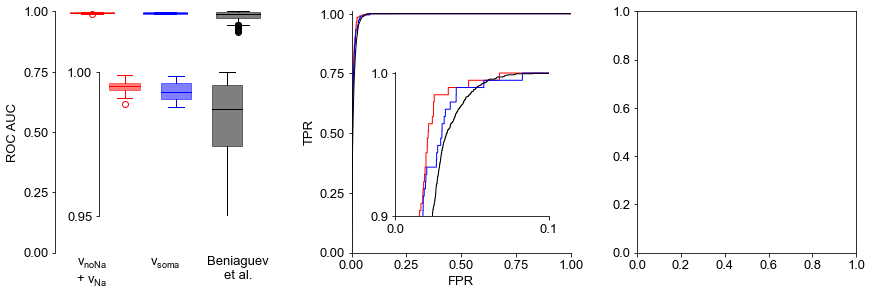

In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (12,4))
gs = fig.add_gridspec(1,3, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

color1 = "red"
color2 = "blue"
color3 = "black"

colors = [color1, color2, color3]

bp1 = ax1.boxplot(rocarea_array[:,0], positions=[1], widths = 0.6, patch_artist=True)
bp2 = ax1.boxplot(rocarea_array[:,1], positions=[2], widths = 0.6, patch_artist=True)
bp3 = ax1.boxplot(beniag_array, positions=[3], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3]

for i in range(3):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ax1.set_xticklabels(["$\mathregular{v_{noNa}}$\n+ $\mathregular{v_{Na}}$",
                     "$\mathregular{v_{soma}}$", "Beniaguev\net al."], rotation=0)
ax1.set_ylabel("ROC AUC")
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.set_ylim(0,1)
ax1.tick_params(axis="x", length=0)
ax1.set_yticks(np.arange(0,1.01,0.25))

ins = ax1.inset_axes([0.2,0.15,0.7,0.6])
bp1 = ins.boxplot(rocarea_array[:,0], positions=[1], widths = 0.6, patch_artist=True)
bp2 = ins.boxplot(rocarea_array[:,1], positions=[2], widths = 0.6, patch_artist=True)
bp3 = ins.boxplot(beniag_array, positions=[3], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3]

for i in range(3):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.set_ylim(0.95,1)
ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_yticks(np.arange(0.95,1.001,0.05))

ax2.plot(fpr_comb_pred, tpr_comb_pred, linewidth=1, color=color1)
ax2.plot(fpr_whole_pred, tpr_whole_pred, linewidth=1, color=color2)
ax2.plot(fpr_beniag, tpr_beniag, linewidth=1, color=color3)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.set_ylim(0,1.01)
ax2.set_xlim(0,1)
ax2.set_xlabel("FPR")
ax2.set_ylabel("TPR")
ax2.set_xticks(np.arange(0,1.01,0.25))
ax2.set_yticks(np.arange(0,1.01,0.25))

ins = ax2.inset_axes([0.2,0.15,0.7,0.6])
ins.plot(fpr_comb_pred, tpr_comb_pred, linewidth=1, color=color1)
ins.plot(fpr_whole_pred, tpr_whole_pred, linewidth=1, color=color2)
ins.plot(fpr_beniag, tpr_beniag, linewidth=1, color=color3)
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.set_ylim(0.9,1.001)
ins.set_xlim(0,0.1)
ins.set_xticks([0,0.1])
ins.set_yticks([0.9,1])

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig_ap/fig_ap_raw.pdf", bbox_inches="tight", transparent=True)

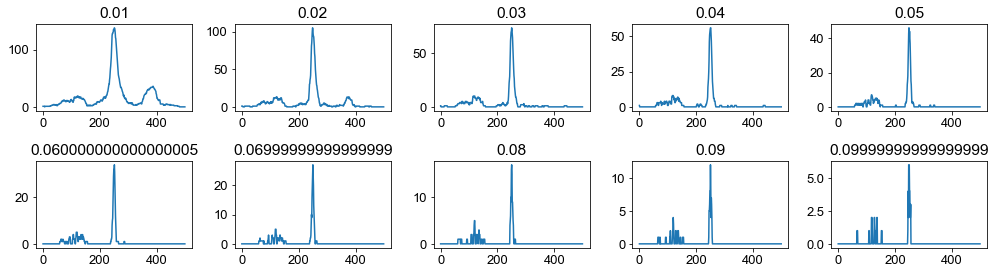

In [16]:
thresh_list = np.arange(0.01,0.11,0.01)
spk_idx = np.where(spk.flatten() > 0)[0]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14,4))
for row in range(2):
    for col in range(5):
        idx = row*5 + col
        thresh = thresh_list[idx]
        pred_plot = np.zeros((comb_pred.flatten().size))
        spk_corr = np.zeros((100 * 5))
        pos_idx = np.where(comb_pred.flatten() >= thresh)[0]
        neg_idx = np.where(comb_pred.flatten() < thresh)[0]
        pred_plot[pos_idx] = 1
        pred_plot[neg_idx] = 0
        for i in range(spk_idx.size):
            t = spk_idx[i]
            spk_corr += pred_plot[t-50 * 5 : t+50* 5]
        axs[row,col].plot(spk_corr)
        axs[row,col].set_title(str(thresh))
        
fig.tight_layout()

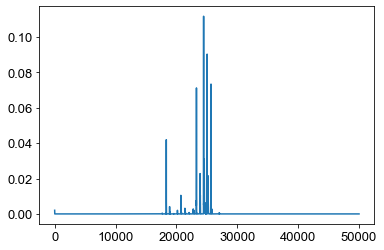

In [14]:
#beniag thresh = 0.1
plt.plot(comb_pred[0])